In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
print(pi)

3.141592653589793


In [9]:
SDS = array([1, 2, 3, 4, 6, 8, 10, 15, 20])
SDS = SDS/1000
with open("data.txt") as file:
    surface_tensions = [float(line.split()[7]) for line in file.readlines()[1:]]
    means,stdev = (lambda a, b, c: ([(a.append(mean([c[i*5+j] for j in range(5)])), b.append(std([c[i*5+j] for j in range(5)]))) for i in range(9)], a, b))([], [], surface_tensions)[1:]
    #means = [mean([[float(line.split()[7]) for line in file.readlines()[1:]][i*5+j] for j in range(5)]) for i in range(9)]
    
    grouped = [[surface_tensions[i*5+j] for j in range(5)] for i in range(9)]
    #test = file.readlines()[1].split()[7]
    grouped[0] = grouped[0][1:]
    grouped[5] = grouped[5][1:]
    grouped[2] = grouped[2][:4]
stdev, means = (lambda a, b: ([(a.append(std(i)), b.append(mean(i))) for i in grouped], a, b))([],[])[1:]
#print(means, stdev)
#print(surface_tensions)
#print(grouped)
print(stdev, means)
[print(i) for i in grouped]
#print("Hello    there,  GENERAL KENOBI".split()[2]       )

[1.078926632202136, 1.0124577513337123, 0.6848816251795171, 1.0592745869696314, 0.8185005846729179, 0.5394014674207153, 0.9551013530785988, 0.514559426488907, 0.8808760849561174] [50.6913792609526, 45.62952909860528, 36.63156061582872, 39.38210086162421, 40.353974102685534, 35.591166211317926, 36.786313926233035, 37.12063515376333, 35.11920831604518]
[50.92368207683533, 49.944560244334866, 52.347255252032554, 49.550019470607666]
[46.901543892282156, 46.69493132428372, 44.84673077832159, 45.37712788073379, 44.32731161740515]
[35.61375074183195, 36.66866206075319, 36.69880527375653, 37.54502438697321]
[37.79027825134654, 38.742920644957124, 40.15352763405193, 40.82167135075066, 39.40210642701483]
[40.38609410835486, 41.54866032462691, 40.59252000585431, 40.25013688405233, 38.99245919053925]
[35.408749327799505, 34.78811745801485, 36.077523609339444, 36.09027445011792]
[37.57413586414281, 37.797717838082804, 36.55999857650808, 36.90242427948933, 35.09729307294214]
[37.52634689064285, 37.3

[None, None, None, None, None, None, None, None, None]

In [41]:
line1 = polyfit(log(SDS)[:5], means[:5], cov = True, deg = 1)
line2 = polyfit(log(SDS)[5:], means[5:], cov = True, deg = 1)
print(line1)
print(line2)
print(len(means[:5]), len(means[5:]))

(array([-6.72026862,  2.79543381]), array([[  7.22679945,  42.73779328],
       [ 42.73779328, 255.45944433]]))
(array([-0.39763123, 34.41019985]), array([[ 2.62629407, 11.51972158],
       [11.51972158, 50.85926988]]))
5 4


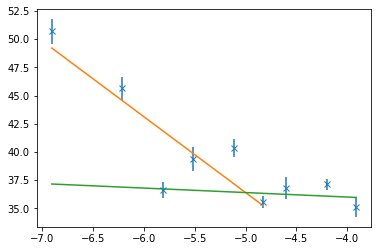

In [23]:
errorbar(log(SDS), means, stdev, linestyle = "", marker = "x")
plot(log(SDS)[:6], line1[0][0]*log(SDS)[:6]+line1[0][1],)
plot(log(SDS)[:], line2[0][0]*log(SDS)[:]+line2[0][1])

In [40]:
SDS_CMC = e**((line2[0][1]-line1[0][1])/(line1[0][0]-line2[0][0]))
print(SDS_CMC)
errors = [line1[1][0,0],line1[1][1,1],line2[1][0,0],line2[1][1,1]]
for i in range(len(errors)):
    if i % 2:
        a = "C"
    else:
        a = "M"
    print(a+ " error = "+ str(errors[i]**(1/2)))


0.006736264415820764
M error = 2.6882707183144015
C error = 15.983098708686265
M error = 1.620584485265295
C error = 7.131568542437609


In [43]:
for i in [line1[0][0],line1[0][1],line2[0][0],line2[0][1]]:
    print(i)

-6.720268622402046
2.7954338106309327
-0.3976312281395669
34.41019985230167
